In [8]:
pip install cirq

In [9]:
#importing required libraries
import cirq
import numpy as np
import scipy as sp
import random
import time

In [10]:
# Custom function used to respresent a a set of bits in string format
def bitstring(bits):
    return ''.join(str(int(b)) for b in bits)

In [11]:
def bnv_circuit(qubits):

  # Generating secret number that needs to be encoded by the oracle
  a=[random.randint(0, 1) for _ in range(qubits)]
  # Generating the random bit in the function  f(x) = ax+b
  b = random.randint(0, 1)

  # initializing the circuit in Cirq 
  c = cirq.Circuit()

  # Defining number of qubits in the circuit
  lines=cirq.LineQubit.range(qubits+1)

  # Segregating input and output qubits
  input_qubits=lines[:qubits]
  output_qubit = lines[-1]

  # Applying H gate for superposition
  c.append([cirq.X(output_qubit),cirq.H(output_qubit),cirq.H.on_each(*input_qubits)])

  # defining the orale function of the circuit
  def oracle(a,b,c):
    #Initalizing CNOT gates for qubits that hold value |1>
    if b:
      c.append(cirq.X(output_qubit))
    for i,encoded in zip(input_qubits, a):
      if (encoded):
        c.append(cirq.CNOT(i,output_qubit))
  
  oracle(a,b,c)

  # Measuring the result in H basis
  c.append([cirq.H.on_each(*input_qubits), cirq.measure(*input_qubits, key='result')])
  
  # Displaying oracle function for cross verification
  print(
    'Secret function:\nf(x) = a·<{}> + {} (mod 2)'.format(
        ', '.join(str(e) for e in a), b
    ))
  
  return c
  


In [6]:
c= bnv_circuit(6)

Secret function:
f(x) = a·<1, 0, 0, 0, 0, 1> + 0 (mod 2)


In [7]:
c

0: ───H───────@───H───────M('result')───
              │           │
1: ───H───H───┼───────────M─────────────
              │           │
2: ───H───H───┼───────────M─────────────
              │           │
3: ───H───H───┼───────────M─────────────
              │           │
4: ───H───H───┼───────────M─────────────
              │           │
5: ───H───────┼───@───H───M─────────────
              │   │
6: ───X───H───X───X─────────────────────

In [13]:
# Function defined to run simulation of the ciruit above &
# To determine the most common bitstring that is determined by the circuit after performing a couple of simulations of the circuit.
def run_simulation(c,run_count):
  simulator = cirq.Simulator()
  result = simulator.run(c, repetitions=run_count)
  frequencies = result.histogram(key='result', fold_func=bitstring)
  print(f'Sampled results:\n{frequencies}')

  # Check if we actually found the secret value.
  most_common_bitstring = frequencies.most_common(1)[0][0]


In [14]:
# Running the algorithm by altering the circuit for varied values of n, where n represents number of qubits & 
# Capturing time taken for the algorithm to run for each value of n
l=[]
for i in range(2,20):
  st=time.time()
  c=bnv_circuit(i)
  print(c)
  run_simulation(c,1024)
  end=time.time()
  l.append(end-st)




Secret function:
f(x) = a·<0, 1> + 1 (mod 2)
0: ───H───H───────────────M('result')───
                          │
1: ───H───────────@───H───M─────────────
                  │
2: ───X───H───X───X─────────────────────
Sampled results:
Counter({'01': 1024})
Secret function:
f(x) = a·<0, 0, 1> + 1 (mod 2)
0: ───H───H───────────────M('result')───
                          │
1: ───H───H───────────────M─────────────
                          │
2: ───H───────────@───H───M─────────────
                  │
3: ───X───H───X───X─────────────────────
Sampled results:
Counter({'001': 1024})
Secret function:
f(x) = a·<1, 1, 1, 0> + 0 (mod 2)
0: ───H───────@───H───────────M('result')───
              │               │
1: ───H───────┼───@───H───────M─────────────
              │   │           │
2: ───H───────┼───┼───@───H───M─────────────
              │   │   │       │
3: ───H───H───┼───┼───┼───────M─────────────
              │   │   │
4: ───X───H───X───X───X─────────────────────
Sampled results:
Coun

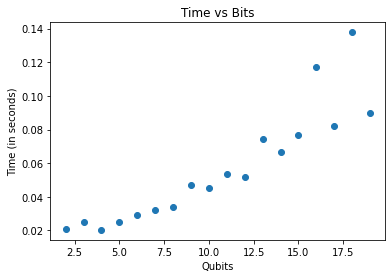

In [17]:
import matplotlib.pyplot as plt

# Plotting the time taken by the algorithm against the number of qubits in the circuit to analyze scalability of the algorithm
plt.scatter(range(2,20),l)
plt.title('Time vs Bits')
plt.xlabel('Qubits')
plt.ylabel('Time (in seconds)')
plt.show()